<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/00_Math_behind_Neural_Network_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Műveletek függvényekkel

Különös tekintettel a láncszabályra és a deriváltakra nézve.

### Érdekes kitekintések a Notebook használatához

<a href="https://hu.wikipedia.org/wiki/Euler-f%C3%A9le_sz%C3%A1m">Euler féle szám</a>

<a href="https://hu.wikipedia.org/wiki/Hat%C3%A1rozatlan_integr%C3%A1l">Határozatlan integrál</a>

<a href="https://hu.wikipedia.org/wiki/Hiperbolikus_f%C3%BCggv%C3%A9nyek">Hiberbolikus függvények</a>

<a href="https://hu.wikipedia.org/wiki/Szigmoid_f%C3%BCggv%C3%A9nyek">Szigmoid függvények</a>

<a href="https://hu.wikipedia.org/wiki/Differenci%C3%A1lsz%C3%A1m%C3%ADt%C3%A1s">Diffenciál számítás</a>

<a href="https://hu.wikipedia.org/wiki/Parci%C3%A1lis_deriv%C3%A1lt">Parciális derivált</a>

<a href="https://hu.wikipedia.org/wiki/Deriv%C3%A1lt">Derivált</a>

### További olvasmányok

<a href="https://becominghuman.ai/what-is-derivative-of-sigmoid-function-56525895f0eb">Calculate the derive of sigmoid function in neural net</a>


### LaTeX

<a href="https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd">Latex használat Notebookban</a>



In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
def square(x):
  return x**2

def abs(x):
  return np.abs(x)

def linear(x):
  return 2 + 1.3*x

def sigmoid(x):
  return 1 / (1 + 2.7182818**-x)

def tanh(x):
  return (2.7182818**x - 2.7182818**-x) / (2.7182818**x + 2.7182818**-x)

In [184]:
x = np.arange(-5, 5, 0.1)

In [185]:
y_square = square(x)
y_abs = abs(x)
y_lin = linear(x)
y_sigmoid = sigmoid(x) * 10
y_tanh = tanh(x) * 10

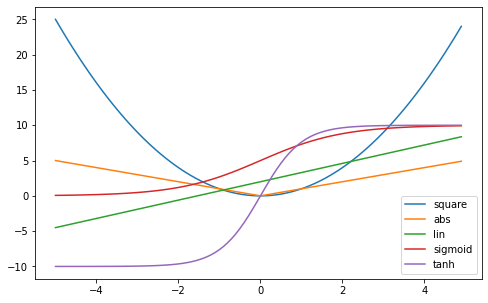

In [186]:
plt.figure(figsize=(8, 5))
plt.plot(x, y_square, label = 'square')
plt.plot(x, y_abs, label = 'abs')
plt.plot(x, y_lin, label = 'lin')
plt.plot(x, y_sigmoid, label = 'sigmoid')
plt.plot(x, y_tanh, label = 'tanh')
plt.legend()
plt.show()

In [187]:
version_1 = square(linear(abs(x)))

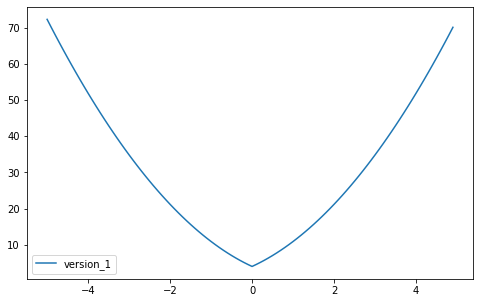

In [188]:
plt.figure(figsize=(8, 5))
plt.plot(x, version_1, label = 'version_1')
plt.legend()
plt.show()

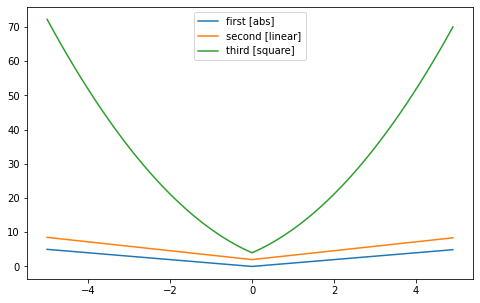

In [189]:
version_1 = square(linear(abs(x)))

first  = abs(x)
second = linear(first)
third  = square(second)

plt.figure(figsize=(8, 5))
plt.plot(x, first, label = 'first [abs]')
plt.plot(x, second, label = 'second [linear]')
plt.plot(x, third, label = 'third [square]')
plt.legend()
plt.show()

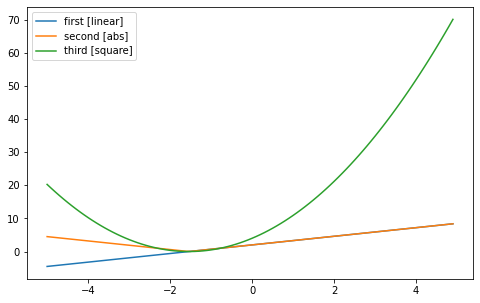

In [190]:
version_2 = square(abs(linear(x)))

first  = linear(x)
second = abs(first)
third  = square(second)

plt.figure(figsize=(8, 5))
plt.plot(x, first, label = 'first [linear]')
plt.plot(x, second, label = 'second [abs]')
plt.plot(x, third, label = 'third [square]')
plt.legend()
plt.show()

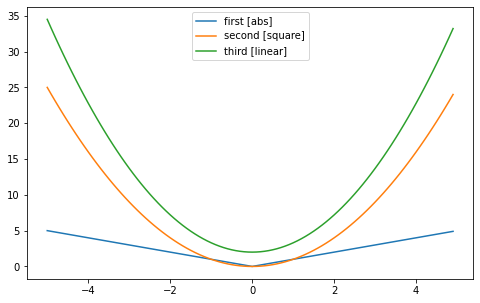

In [191]:
version_3 = linear(square(abs(x)))

first  = abs(x)
second = square(first)
third  = linear(second)

plt.figure(figsize=(8, 5))
plt.plot(x, first, label = 'first [abs]')
plt.plot(x, second, label = 'second [square]')
plt.plot(x, third, label = 'third [linear]')
plt.legend()
plt.show()

Hiberbolikus tangens:

$$ \text{th} \; x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}, \;\;\; \frac{d}{dx} \text{th} \; x = 1 - \text{th}^2 x$$


Sigmoid:

$$ \sigma(x) = \frac{1}{1+e^{-x}}, \;\;\; \frac{d}{dx} =\sigma(x) (1-\sigma(x)) $$


In [192]:
def tanh_derive(x):
  return 1-(tanh(x)*tanh(x))

def sigmoid_derive(x):
  return sigmoid(x) * (1-sigmoid(x))

### Hiberbolikus tangens és deriváltja

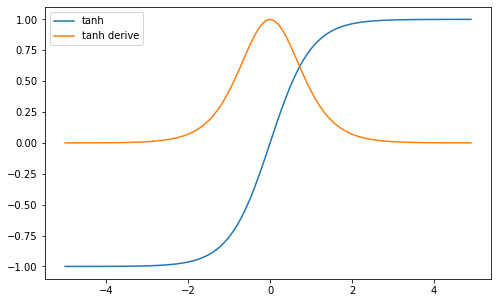

In [193]:

y_tanh = tanh(x)

y_tanh_derive = tanh_derive(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_tanh, label = 'tanh')
plt.plot(x, y_tanh_derive, label = 'tanh derive')
plt.legend()
plt.show()

### Sigmoid függvény és deriváltja

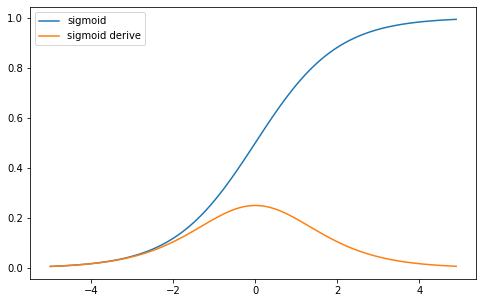

In [194]:
y_sigmoid_derive = sigmoid_derive(x)

y_sigmoid = sigmoid(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_sigmoid, label = 'sigmoid')
plt.plot(x, y_sigmoid_derive, label = 'sigmoid derive')
plt.legend()
plt.show()

## Játék a Scikit Learn-nel

A Scikit Learn MLPRegressor osztályával. Fogjuk a súlyokat és kézzel állítjuk be.

In [242]:
import ipywidgets as widgets
from sklearn.neural_network import MLPRegressor
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import HTML
from base64 import b64encode

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [196]:
# Létre kell hozni a MLPRegression objektumot -> figyeljünk oda, hogy milyen áktivációs függvényt kap

mlp = MLPRegressor(hidden_layer_sizes=(2, ), max_iter=1, n_iter_no_change=1, activation='logistic')

mlp.fit(x.reshape(-1, 1), y_sigmoid.ravel()) # -> ahhoz, hogy felül tudjuk írni a súlyokat előbb illeszteni kell

MLPRegressor(activation='logistic', hidden_layer_sizes=(2,), max_iter=1,
             n_iter_no_change=1)

In [197]:
mlp.coefs_

[array([[-0.29704593, -0.68465361]]), array([[-0.4605025 ],
        [ 0.58838561]])]

In [198]:
mlp.intercepts_

[array([-0.49903016,  0.38790989]), array([0.0954465])]

In [199]:
mlp.coefs_ = [np.array([[0.52163885, 0.83947953]]), np.array([[1.22757877], [0.85383002]])]
mlp.intercepts_ = [np.array([0.98333675, -1.14206471]), np.array([-0.35194626])]

In [200]:
def show_nn(_iw1, _ib1, _iw2 = 0, _ib2 = 0, _ow1 = 1, _ow2 = 0, _ob = 0):

  iw1 = _iw1  # input to neuron1 weight
  ib1 = _ib1  # input to neuron1 bias
  iw2 = _iw2  # input to neuron2 weight
  ib2 = _ib2  # input to neuron2 bias
  ow1 = _ow1  # neuron1 to output weight
  ow2 = _ow2  # neuron2 to output weight
  ob  = _ob   # output bias

  mlp.coefs_ = [np.array([[iw1, iw2]]), np.array([[ib1], [ib2]])]
  mlp.intercepts_ = [np.array([ow1, ow2]), np.array([ob])]

  predicted = mlp.predict(x.reshape(-1, 1))

  plt.figure(figsize=(8, 5))
  plt.plot(x, y_sigmoid, label = 'y_sigmoid')
  plt.plot(x, predicted, label = 'nn')
  plt.legend()
  plt.show()


In [201]:
_iw1 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=2)
_ib1 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=1)
_iw2 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0)
_ib2 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0)
_ow1 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=1)
_ow2 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0)
_ob  = widgets.FloatSlider(min=-1, max=1, step=0.01, value=0)

In [202]:
interact(show_nn, _iw1=_iw1, _ib1=_ib1, _iw2=_iw2, _ib2=_ib2, _ow1=_ow1, _ow2=_ow2, _ob=_ob);

interactive(children=(FloatSlider(value=2.0, description='_iw1', max=3.0, min=-3.0, step=0.01), FloatSlider(va…

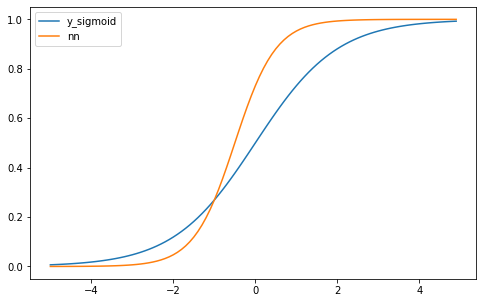

In [203]:
show_nn(_iw1 = 2, _ib1 = 1, _ow1 = 1)

## A derviálási szabályok

Ezekre azért van szükség mert amikor ki akarjuk majd számolni a gradienseket, akkor nem árt tudni ezeket. Persze ezeket már megteszik helyettünk a keretrendszerek mint amilyen a [Keras](#https://keras.io) vagy a [PyTorch](#https://pytorch.org).

Olvasmányok:

[A derivált - Wikipedia](#https://hu.wikipedia.org/wiki/Deriv%C3%A1lt)


## Elemi függvények deriváltjai

\begin{eqnarray}
\text{Konstans} \; c & , 0 \\
\text{Konstans szorzo} \; c * x & , c \\
\text{Konstans alap, var kitevo} \; a^x & , a^x \cdot ln|a| \\
\text{Hatvany} \; x ^ n & , x \cdot x^{n-1} \\
\text{Exp} \; e ^ x & , e ^ x \\
\text{Natural log} \; \text{ln}(x) & , \frac{1}{x} \\
\text{Log (a > 1)} \; \text{log}_a x & , \frac{1}{x \text{ ln } a} = \frac{\text{log}_a e}{x} \\
\text{Sin} \; \text{sin}(x) & , \text{cos }x \\
\text{Cos} \; \text{cos}(x) & , \text{-sin }x \\
\text{Tangnt} \; \text{tg}(x) & , 1 + \text{tg}^2 \; x \\
\end{eqnarray}




## Műveletek deriváltjai (deriválási szabályok)

Függvény szorzása konstanssal:

$$(c \cdot f(x))' ⇒ c \cdot f'(x)$$


Függvények összeadása kivonása:

$$(f(x) \pm g(x))' ⇒ f'(x) \pm g'(x)$$

Függvények szorzása:

$$(f(x) \cdot g(x))' ⇒ f'(x)g(x) + f(x)g'(x)$$

Függvények osztása:

$$\left( \frac{f(x)}{g(x)} \right)' ⇒ \frac{f'(x)g(x) - f(x)g'(x)}{g^2(x)}$$

Függvények osztása:

$$\left( \frac{f(x)}{g(x)} \right)' ⇒ \frac{f'(x)g(x) - f(x)g'(x)}{g^2(x)}$$

Függvény hatványozása:

$$( (f(x))^{g(x)} )' ⇒ f(x)^{g(x)} \left( g'(x) \text{ln } f(x) + g(x) \frac{1}{f(x)} f'(x) \right)$$



## Egy kis derivált szimuláció

Az öteltet a <a href="https://hu.wikipedia.org/wiki/Parci%C3%A1lis_deriv%C3%A1lt">Wikipedia</a> szócikből vettem.

In [204]:
def f(x):
  return x * np.sin(x**2) + 1

def f_derive(x):
  return np.sin(x**2) + 2*x**2 * np.cos(x**2)

In [250]:
def derive_plotter(x, save = False, i = 1):

  _x = np.arange(-1, 3, 0.01)

  fig = plt.figure(figsize=(8, 5))
  ax = fig.add_subplot(1, 1, 1)

  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  plt.plot(_x, f(_x))
  plt.plot(_x, f_derive(_x), label="f'(x)")
  plt.xlim(-2.2, 4.2)
  plt.ylim(-1.4, 4.1)
  plt.legend(frameon=False)

  xc = x
  derive_at_xc = f_derive(xc)
  y_at_xc = f(xc)
  if( save == False ):
    print('derive_at_xc = ', derive_at_xc)
    print('y_at_xc = ', y_at_xc)
  plt.plot([xc], [y_at_xc], 'o', c='black')

  # _line = derive_at_xc * (_x-xc)
  _line = derive_at_xc * (_x - xc) + y_at_xc
  # _line = np.arange(xc-10, xc+10)
  plt.plot(_x, _line)

  if( save == True ):
    plt.savefig('derive_{0:04}'.format(i)+'.png', bbox_inches='tight'); plt.close('all');
  else:
    plt.show()

derive_at_xc =  0.00013067247173981222
y_at_xc =  2.307619412264337


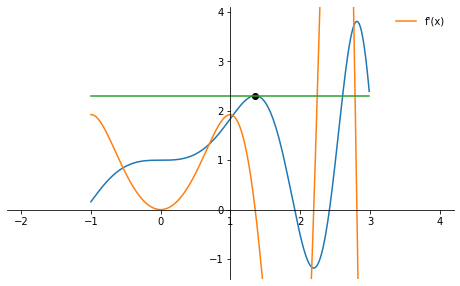

In [251]:
derive_plotter(1.3552)

derive_at_xc =  1.3670786293575456
y_at_xc =  2.1897500178300238


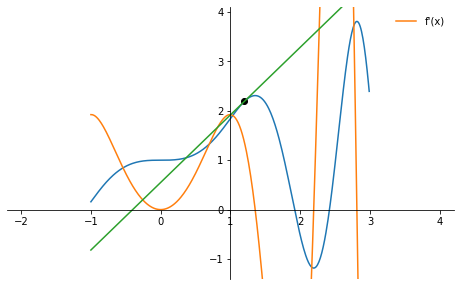

In [252]:
derive_plotter(1.2)

In [253]:
interact(derive_plotter, x = widgets.FloatSlider(min=-1, max=3, step=0.01, value=0), save=fixed(False), i=fixed(1));

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-1.0, step=0.01), Output()), _dom_c…

In [255]:
!rm *.png

c = 0
for i, v in enumerate(_x):
  if( i % 10 == 0):
    derive_plotter(v, save=True, i=c)
    c += 1

In [262]:

%%capture
!rm *.mp4
!ffmpeg -r 10 -pattern_type glob -i "derive_*.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p animation_derive.mp4


In [264]:
mp4 = open('animation_derive.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=460 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Egy példa

Egy összetett függvény deriváltjának kiszámolására.

$$ f(x) = 2 \text{ sin }x^2 ⇒ 4 \text{ sin }x \text{ cos }x$$

$$ g(x) = \text{ log }x ⇒ \frac{1}{x}$$

$$(f(x) \cdot g(x))' ⇒ f'(x)g(x) + f(x)g'(x)$$

In [357]:
def f(x):
  return 2 * np.sin(x)**2

def g(x):
  return np.log(x)

def v(x):
  return f(x)*g(x)

def f_derive(x):
  return 4*np.sin(x)*np.cos(x)

def g_derive(x):
  return 1/x

def v_derive(x):
  return ((f_derive(x) * g(x)) + (f(x) * g_derive(x)))

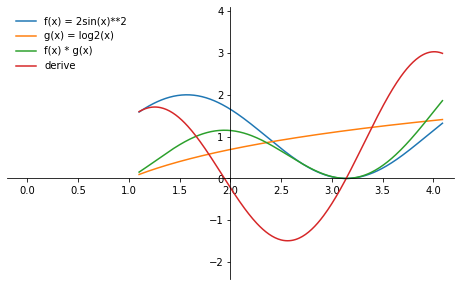

In [358]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(_x, f(_x), label='f(x) = 2sin(x)**2')
plt.plot(_x, g(_x), label='g(x) = log2(x)')
plt.plot(_x, v(_x), label='f(x) * g(x)')
plt.plot(_x, v_derive(_x), label='derive')

plt.xlim(-0.2, 4.2)
plt.ylim(-2.4, 4.1)
plt.legend(frameon=False)
plt.show()

In [359]:
from sympy import *

x = Symbol('x')
y = sin(x**2)/log(x)
# y = 2*sin(x)**2
# y = log(x) + 1
# y = x**2 + 1
yprime = y.diff(x)
yprime


2*x*cos(x**2)/log(x) - sin(x**2)/(x*log(x)**2)

In [360]:
def derive_plotter(x, _x, f, g, v, v_derive, save = False, i = 1):

  _x = _x

  fig = plt.figure(figsize=(8, 5))
  ax = fig.add_subplot(1, 1, 1)

  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  plt.plot(_x, f(_x), label='f(x) = 2sin(x)**2')
  plt.plot(_x, g(_x), label='g(x) = log2(x)')
  plt.plot(_x, v(_x), label='f(x) * g(x)')
  plt.plot(_x, v_derive(_x), label='derive')

  plt.xlim(-0.2, 4.2)
  plt.ylim(-2.4, 4.1)
  plt.legend(frameon=False)

  xc = x
  derive_at_xc = v_derive(xc)
  y_at_xc = v(xc)
  if( save == False ):
    print('derive_at_xc = ', derive_at_xc)
    print('y_at_xc = ', y_at_xc)
  plt.plot([xc], [y_at_xc], 'o', c='black')

  _line = derive_at_xc * (_x - xc) + y_at_xc
  plt.plot(_x, _line, c='black')

  if( save == True ):
    plt.savefig('derive_{0:04}'.format(i)+'.png', bbox_inches='tight'); plt.close('all');
  else:
    plt.show()

derive_at_xc =  -0.6006620288147794
y_at_xc =  0.04375741254003615


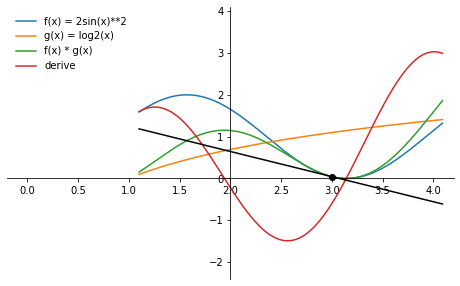

In [361]:
derive_plotter(3, _x, f, g, v, v_derive)

In [365]:
!rm *.png

c = 0
for i, value in enumerate(_x):
  if( i % 10 == 0):
    derive_plotter(value, _x, f, g, v, v_derive, save=True, i=c)
    c += 1

In [366]:

%%capture
!rm *.mp4
!ffmpeg -r 10 -pattern_type glob -i "derive_*.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p animation_derive_v.mp4

In [367]:
mp4 = open('animation_derive_v.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=460 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)